In [3]:
!pip install pandas matplotlib seaborn plotly ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

In [7]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv(list(uploaded.keys())[0])

Saving IPL_2023_DATASET.csv to IPL_2023_DATASET (1).csv


In [10]:
df.isnull().sum()


df.fillna(0, inplace=True)

In [13]:
top_5_players = df[['Player', 'Base Price', 'COST IN ₹ (CR.)']].sort_values(by='COST IN ₹ (CR.)', ascending=False).head(5)


print(top_5_players)

              Player Base Price  COST IN ₹ (CR.)
97        Sam Curran   20000000            18.50
144    Cameron Green   20000000            17.50
25        Ben Stokes   20000000            16.25
119  Nicholas Pooran   20000000            16.00
218      Harry Brook   15000000            13.25


In [14]:
print(df.columns)


Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2022 Squad', 'Team', 'Base Price IN ₹',
       'Base Price IN $'],
      dtype='object')


In [15]:
team_distribution = df['Team'].value_counts()
print(team_distribution)

Unsold                         325
Gujarat Titans                  25
Chennai Super Kings             25
Delhi Capitals                  25
Lucknow Super Giants            25
Royal Challengers Bangalore     25
Rajasthan Royals                25
Sunrisers Hyderabad             25
Mumbai Indians                  24
Kolkata Knight Riders           22
Punjab Kings                    22
Name: Team, dtype: int64


In [19]:
avg_price_by_team = df.groupby('Team')['COST IN ₹ (CR.)'].mean()


print(avg_price_by_team)












Team
Chennai Super Kings            0.758000
Delhi Capitals                 0.600000
Gujarat Titans                 0.592000
Kolkata Knight Riders          0.245455
Lucknow Super Giants           0.792000
Mumbai Indians                 0.854167
Punjab Kings                   0.909091
Rajasthan Royals               0.394000
Royal Challengers Bangalore    0.280000
Sunrisers Hyderabad            1.428000
Unsold                         0.000000
Name: COST IN ₹ (CR.), dtype: float64


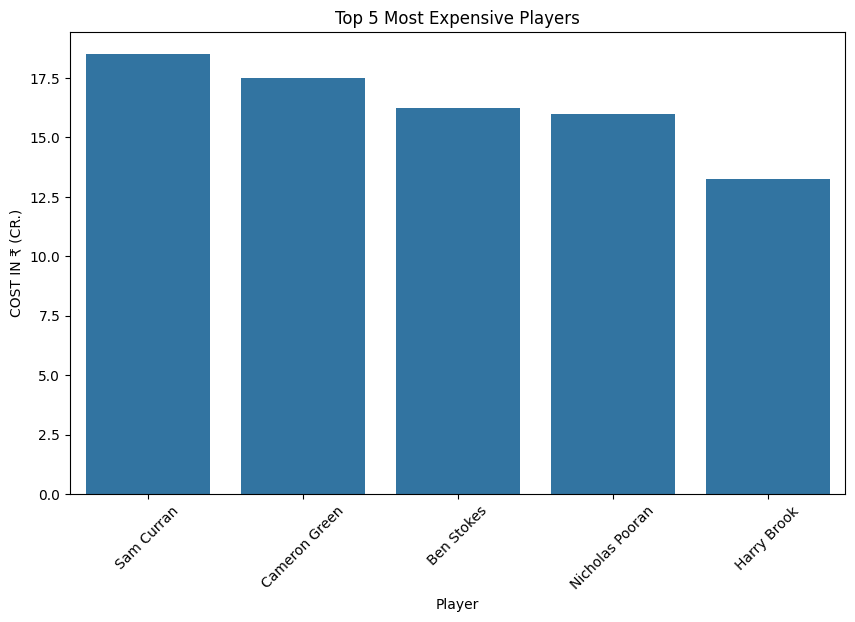

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Player', y='COST IN ₹ (CR.)', data=top_5_players)
plt.title('Top 5 Most Expensive Players')
plt.xticks(rotation=45)
plt.show()

In [23]:
fig = px.bar(df, x='Team', y='COST IN ₹ (CR.)', title="Team Price Distribution", color='Team')
fig.show()

In [28]:

team_selector = widgets.Dropdown(
    options=df['Team'].unique(),
    description='Team:',
    disabled=False,
)

def display_avg_price(team):
    avg_price = df[df['Team'] == team]['COST IN ₹ (CR.)'].mean()
    print(f"Average price for {team}: {avg_price}")


widgets.interactive(display_avg_price, team=team_selector)


interactive(children=(Dropdown(description='Team:', options=('Gujarat Titans', 'Chennai Super Kings', 'Delhi C…

In [29]:
team_selector = widgets.Dropdown(
    options=df['Team'].unique(),
    description='Select Team:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)


def display_avg_price(team):
    team_data = df[df['Team'] == team]
    avg_price = team_data['COST IN ₹ (CR.)'].mean()


    avg_price_formatted = f"₹{avg_price:.2f} CR."
    display_message = f"<b>Average Sold Price for {team}:</b> <span style='color:green;font-size:20px;'>{avg_price_formatted}</span>"


    from IPython.display import display, HTML
    display(HTML(display_message))


    plt.figure(figsize=(8, 5))
    sns.barplot(x='Player', y='COST IN ₹ (CR.)', data=team_data, palette='Blues_d')
    plt.xticks(rotation=90)
    plt.title(f'{team} Player Price Distribution')
    plt.ylabel('Price (₹ CR.)')
    plt.xlabel('Player')
    plt.show()


widgets.interactive(display_avg_price, team=team_selector)

interactive(children=(Dropdown(description='Select Team:', layout=Layout(width='50%'), options=('Gujarat Titan…